In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.5066

Best Fitness:	200.1365
Solution:	200.0000
Diff:		0.1365

[0:11:49][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.1649

Best Fitness:	200.0435
Solution:	200.0000
Diff:		0.0435

[0:22:51][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.1932

Best Fitness:	200.0503
Solution:	200.0000
Diff:		0.0503

[0:33:03][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2396

Best Fitness:	200.0676
Solution:	200.0000
Diff:		0.0676

[0:42:40][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.8075

Best Fitness:	200.1268
Solution:	200.0000
Diff:		0.1268

[0:52:16][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3833

Best Fitness:	200.0591
Solution:	200.0000
Diff:		0.0591

[1:01:38][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2866

Best Fitness:	200.0804
Solution:	200.0000
Diff:		0.0804

[1:11:20][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.5613

Best Fitness:	200.2008
Solution:	200.0000
Diff:		0.2008

[1:21:15][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.6574

Best Fitness:	200.1218
Solution:	200.0000
Diff:		0.1218

[1:31:07][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2636

Best Fitness:	200.0491
Solution:	200.0000
Diff:		0.0491

[1:40:16][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3033

Best Fitness:	200.0522
Solution:	200.0000
Diff:		0.0522

[1:49:00][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.7836

Best Fitness:	200.2331
Solution:	200.0000
Diff:		0.2331

[1:57:55][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.5533

Best Fitness:	200.1147
Solution:	200.0000
Diff:		0.1147

[2:07:07][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.8163

Best Fitness:	200.2319
Solution:	200.0000
Diff:		0.2319

[2:15:59][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4551

Best Fitness:	200.1388
Solution:	200.0000
Diff:		0.1388

[2:25:00][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.8225

Best Fitness:	200.2405
Solution:	200.0000
Diff:		0.2405

[2:33:36][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.5176

Best Fitness:	200.0875
Solution:	200.0000
Diff:		0.0875

[2:41:41][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2704

Best Fitness:	200.0816
Solution:	200.0000
Diff:		0.0816

[2:49:52][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4818

Best Fitness:	200.1134
Solution:	200.0000
Diff:		0.1134

[2:57:56][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.1993

Best Fitness:	200.0413
Solution:	200.0000
Diff:		0.0413

[3:05:53][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3573

Best Fitness:	200.0969
Solution:	200.0000
Diff:		0.0969

[3:13:46][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2210

Best Fitness:	200.0301
Solution:	200.0000
Diff:		0.0301

[3:21:09][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3014

Best Fitness:	200.0353
Solution:	200.0000
Diff:		0.0353

[3:28:39][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3099

Best Fitness:	200.0927
Solution:	200.0000
Diff:		0.0927

[3:36:08][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4440

Best Fitness:	200.1616
Solution:	200.0000
Diff:		0.1616

[3:43:36][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.1632

Best Fitness:	200.0372
Solution:	200.0000
Diff:		0.0372

[3:51:11][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.1803

Best Fitness:	200.0491
Solution:	200.0000
Diff:		0.0491

[3:58:26][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.7362

Best Fitness:	200.1558
Solution:	200.0000
Diff:		0.1558

[4:05:27][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2052

Best Fitness:	200.0636
Solution:	200.0000
Diff:		0.0636

[4:12:23][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.7135

Best Fitness:	200.1398
Solution:	200.0000
Diff:		0.1398

[4:19:52][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3498

Best Fitness:	200.0821
Solution:	200.0000
Diff:		0.0821

[4:27:23][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.6592

Best Fitness:	200.2139
Solution:	200.0000
Diff:		0.2139

[4:34:42][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.6816

Best Fitness:	200.1739
Solution:	200.0000
Diff:		0.1739

[4:42:12][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4491

Best Fitness:	200.0906
Solution:	200.0000
Diff:		0.0906

[4:49:20][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4888

Best Fitness:	200.1468
Solution:	200.0000
Diff:		0.1468

[4:56:16][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2437

Best Fitness:	200.0433
Solution:	200.0000
Diff:		0.0433

[5:02:47][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.6136

Best Fitness:	200.1980
Solution:	200.0000
Diff:		0.1980

[5:09:11][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.5242

Best Fitness:	200.1071
Solution:	200.0000
Diff:		0.1071

[5:15:21][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4964

Best Fitness:	200.1289
Solution:	200.0000
Diff:		0.1289

[5:21:19][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2971

Best Fitness:	200.0509
Solution:	200.0000
Diff:		0.0509

[5:26:46][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2051

Best Fitness:	200.0556
Solution:	200.0000
Diff:		0.0556

[5:32:13][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.8081

Best Fitness:	200.1490
Solution:	200.0000
Diff:		0.1490

[5:37:42][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.7019

Best Fitness:	200.1969
Solution:	200.0000
Diff:		0.1969

[5:43:09][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4633

Best Fitness:	200.0894
Solution:	200.0000
Diff:		0.0894

[5:48:37][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3294

Best Fitness:	200.0762
Solution:	200.0000
Diff:		0.0762

[5:53:55][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.4245

Best Fitness:	200.1063
Solution:	200.0000
Diff:		0.1063

[5:58:57][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.6719

Best Fitness:	200.1660
Solution:	200.0000
Diff:		0.1660

[6:03:53][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2492

Best Fitness:	200.0545
Solution:	200.0000
Diff:		0.0545

[6:08:47][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3763

Best Fitness:	200.1126
Solution:	200.0000
Diff:		0.1126

[6:13:41][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.3256

Best Fitness:	200.0729
Solution:	200.0000
Diff:		0.0729

[6:18:39][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.0980

Best Fitness:	200.0198
Solution:	200.0000
Diff:		0.0198

[6:23:50][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

6:23:50

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,0.133615,0.14759,0.160659,0.144340,0.152513,0.106701,0.078295,0.234644,0.148472,0.077894,...,0.137536,0.054796,0.228143,0.158025,0.077666,0.155729,0.191024,0.143532,0.129517,50
294,0.133615,0.14759,0.152590,0.144340,0.107856,0.106701,0.078295,0.098556,0.148472,0.072918,...,0.137536,0.054796,0.130674,0.158025,0.077666,0.155729,0.191024,0.143532,0.061488,50
295,0.133615,0.14759,0.118641,0.144340,0.075437,0.097769,0.078295,0.098556,0.085996,0.072918,...,0.137536,0.054796,0.130674,0.158025,0.077666,0.155729,0.170294,0.109069,0.061488,50
296,0.133615,0.14759,0.118641,0.117353,0.075437,0.097769,0.078295,0.098556,0.085996,0.072918,...,0.102314,0.054796,0.130674,0.146614,0.077666,0.127836,0.125757,0.109069,0.061488,50
297,0.114645,0.14759,0.089192,0.117353,0.061514,0.097769,0.078295,0.098556,0.085996,0.072918,...,0.065269,0.054796,0.130674,0.143558,0.061441,0.127836,0.125757,0.100761,0.061488,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.13651646090312397

Best error for run 1: 0.04351393110093227

Best error for run 2: 0.050252501206387024

Best error for run 3: 0.06763738531330432

Best error for run 4: 0.12675641253611047

Best error for run 5: 0.05911491357215937

Best error for run 6: 0.08044895133022578

Best error for run 7: 0.20076461746694463

Best error for run 8: 0.12184817081933375

Best error for run 9: 0.049090924982266415

Best error for run 10: 0.05224014846862701

Best error for run 11: 0.23314390988986133

Best error for run 12: 0.11471088250652883

Best error for run 13: 0.23194537456882358

Best error for run 14: 0.13882195077403026

Best error for run 15: 0.2404764483777626

Best error for run 16: 0.08749598427507976

Best error for run 17: 0.08162511693055308

Best error for run 18: 0.11344984144957948

Best error for run 19: 0.04126956952757155

Best error for run 20: 0.09690839819353414

Best error for run 21: 0.030094035050353796

Best error for run 22: 0.035344101469888756

Best error for run 23: 0.09273786507955606

Best error for run 24: 0.16157894378613946

Best error for run 25: 0.03718245061884318

Best error for run 26: 0.04907797928203195

Best error for run 27: 0.15583186848155606

Best error for run 28: 0.0636355212537012

Best error for run 29: 0.1397814388444658

Best error for run 30: 0.08210438458866065

Best error for run 31: 0.213879286632789

Best error for run 32: 0.17390394672494836

Best error for run 33: 0.09061340426546849

Best error for run 34: 0.14677823389513378

Best error for run 35: 0.04332388410580279

Best error for run 36: 0.19801821270269215

Best error for run 37: 0.10713265796007931

Best error for run 38: 0.1289233404196466

Best error for run 39: 0.05088164037607612

Best error for run 40: 0.05564826251077193

Best error for run 41: 0.14895291021304047

Best error for run 42: 0.19692816952772318

Best error for run 43: 0.0894451999511432

Best error for run 44: 0.07624560461539431

Best error for run 45: 0.1063471693769884

Best error for run 46: 0.16603498986009413

Best error for run 47: 0.05454192377084155

Best error for run 48: 0.11264353082401612

Best error for run 49: 0.07286712929786177

Best error for run 50: 0.019799952106978935

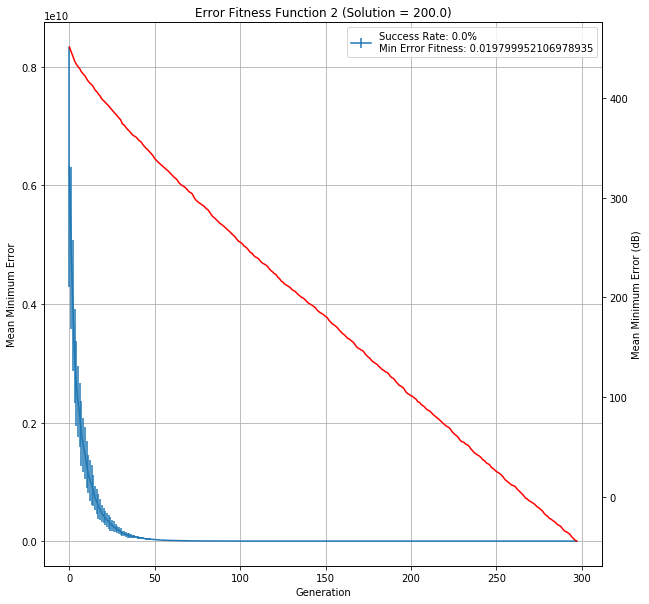

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.9,0.136516,0.043514,0.050253,0.067637,0.126756,0.059115,...,0.076246,0.106347,0.166035,0.054542,0.112644,0.072867,0.0198,0.107222,6:23:50,90000
